In [25]:
#-In this project the main objective is to predict has the client subscribed a term deposit.

#-Two functions were created select_model and hyper_parameter_tuning in order to avoid repetation of code.

#-To deal with the Imbalance Dataset UnderSampling with Centroid method and SMOTEENN was used and the 
#results were compared to find best method for the given dataset.

#-Libraries such as Numpy, Pandas, Seaborn, Matplotlib,etc were used.

#-OrdinalEncoder was used for encoding and the features were scaled using StandardScaler.

# Note:- Conclusion is present at the end.

### Information about the Dataset:

In [ ]:
#DataSet Link:- http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

   #The data is related with direct marketing campaigns of a Portuguese banking institution. 
   #The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   #in order to access if the product (bank term deposit) would be (or not) subscribed. 
   #There are two datasets: 
   #bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).

   #The classification goal is to predict if the client will subscribe a term deposit (variable y).
   
   
   #  Input variables:
   #   bank client data:
   #1 - age (numeric)
   #2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
   #          "blue-collar","self-employed","retired","technician","services") 
   #3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   #4 - education (categorical: "unknown","secondary","primary","tertiary")
   #5 - default: has credit in default? (binary: "yes","no")
   #6 - balance: average yearly balance, in euros (numeric) 
   #7 - housing: has housing loan? (binary: "yes","no")
   #8 - loan: has personal loan? (binary: "yes","no")
   
   #related with the last contact of the current campaign:
   #9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  #10 - day: last contact day of the month (numeric)
  #11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  #12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  #13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  #14 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
    #(numeric, -1 means client was not previously contacted)
  #15 - previous: number of contacts performed before this campaign and for this client (numeric)
  #16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #Output variable (desired target):
  #17 - y - has the client subscribed a term deposit? (binary: "yes","no")   

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing data set
df = pd.read_csv("bank-full.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape #checking (rows,columns)

(45211, 17)

In [4]:
df.info() #checking missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# checking imbalance
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

### Encoding

In [8]:
# Encoding
catcol = df.select_dtypes(object).columns
oe = OrdinalEncoder()
df[catcol] = oe.fit_transform(df[catcol])
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0.0


In [9]:
# Creating Function for models

def model_select(model_name):
    
    model_name.fit(X_train,y_train)
    y_pred = model_name.predict(X_test)
    
    train = model_name.score(X_train,y_train)
    test = model_name.score(X_test,y_test)
    
    ac = accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    cr = classification_report(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)
    
    print(f"Training accuracy:-{train}\nTesting accuracy:-{test}")
    print(f"Accuracy score:-{ac}\nroc_auc_score:-{roc}\n\nClassification report:-\n{cr}\n\nConfusion Matrix:-\n")
    
    plt.figure(figsize=(3,2))
    sns.heatmap(cm,annot=True,cmap="Greens",fmt="d")
    plt.show()

In [27]:
# Function for HyperParameter Tuning

def hyper_parameter_tuning(model_name):
    
    if str(model_name) == "LogisticRegression()":    
        l2 = Ridge(alpha=10)
        model_select(l2)
        
        
    if str(model_name) == "KNeighborsClassifier()":
        for i in range(1,10):
            knn = KNeighborsClassifier(n_neighbors=i)
            knn.fit(X_train,y_train)
            train = knn.score(X_train,y_train)
            test = knn.score(X_test,y_test)
            print(f"{i} {train} {test} {train-test}")
            
            
    if str(model_name) == "SVC()":
        parameter = {"C":[0.1,1,10],"gamma":[0.1,0.01,0.001],"kernel":["rbf","poly"]}
        grid = GridSearchCV(SVC(), parameter, verbose=2,n_jobs=-1 )
        grid.fit(X_train,y_train)
        print(grid.best_estimator_)
        # applying the best parameters 
        svm =grid.best_estimator_
        model_select(svm)
        
        
    if model_name == DecisionTreeClassifier():
        param_grid = {
        'max_depth': [1,2,3,4,5,6,7,8,9],
        'min_samples_split': [1,2,3,4,5],
        'min_samples_leaf': [1, 2, 3,4],
        'criterion': ['gini', 'entropy']
        }
        grid = GridSearchCV(DecisionTreeClassifier(), parameter, verbose=2,n_jobs=-1)
        grid.fit(X_train,y_train)
        print(grid.best_estimator_)
        # applying the best parameters 
        svm =grid.best_estimator_
        model_select(svm)

# UnderSampling Centroid Method

In [11]:
#Spliting feature and Target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=42)
X,y = cc.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

#scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Checking accuracy through various machine learning models

Training accuracy:-0.7690437601296597
Testing accuracy:-0.7700063011972275
Accuracy score:-0.7700063011972275
roc_auc_score:-0.7698827896663024

Classification report:-
              precision    recall  f1-score   support

         0.0       0.77      0.78      0.77      1606
         1.0       0.77      0.76      0.77      1568

    accuracy                           0.77      3174
   macro avg       0.77      0.77      0.77      3174
weighted avg       0.77      0.77      0.77      3174


Confusion Matrix:-



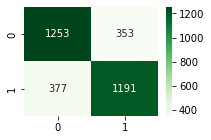

In [13]:
#LogisticRegression
model_select(LogisticRegression())

Training accuracy:-0.9127498649378715
Testing accuracy:-0.8865784499054821
Accuracy score:-0.8865784499054821
roc_auc_score:-0.8871054337052381

Classification report:-
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88      1606
         1.0       0.85      0.93      0.89      1568

    accuracy                           0.89      3174
   macro avg       0.89      0.89      0.89      3174
weighted avg       0.89      0.89      0.89      3174


Confusion Matrix:-



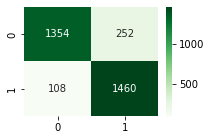

In [14]:
# SVM
model_select(SVC())

Training accuracy:-1.0
Testing accuracy:-0.8506616257088847
Accuracy score:-0.8506616257088847
roc_auc_score:-0.850428955828907

Classification report:-
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      1606
         1.0       0.86      0.83      0.85      1568

    accuracy                           0.85      3174
   macro avg       0.85      0.85      0.85      3174
weighted avg       0.85      0.85      0.85      3174


Confusion Matrix:-



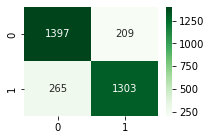

In [15]:
# DecisionTreeClassifier
model_select(DecisionTreeClassifier())

Training accuracy:-0.9109940572663425
Testing accuracy:-0.8667296786389413
Accuracy score:-0.8667296786389413
roc_auc_score:-0.866902972272346

Classification report:-
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      1606
         1.0       0.85      0.88      0.87      1568

    accuracy                           0.87      3174
   macro avg       0.87      0.87      0.87      3174
weighted avg       0.87      0.87      0.87      3174


Confusion Matrix:-



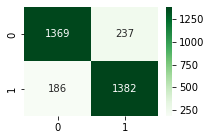

In [16]:
# KNeighborsClassifier
model_select(KNeighborsClassifier())

# SMOTEENN (Mix of Under and Over sampling)

In [17]:
#Spliting feature and Target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN()
X,y = smoteenn.fit_resample(X,y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

#scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Training accuracy:-0.8721314443488888
Testing accuracy:-0.880181654961187
Accuracy score:-0.880181654961187
roc_auc_score:-0.8777430992974662

Classification report:-
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      8492
         1.0       0.88      0.90      0.89     10445

    accuracy                           0.88     18937
   macro avg       0.88      0.88      0.88     18937
weighted avg       0.88      0.88      0.88     18937


Confusion Matrix:-



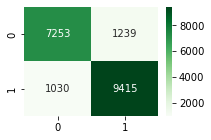

In [18]:
#LogisticRegression
model_select(LogisticRegression())

Training accuracy:-0.9366541438464672
Testing accuracy:-0.9356286634630617
Accuracy score:-0.9356286634630617
roc_auc_score:-0.9335329768315157

Classification report:-
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93      8492
         1.0       0.93      0.95      0.94     10445

    accuracy                           0.94     18937
   macro avg       0.94      0.93      0.93     18937
weighted avg       0.94      0.94      0.94     18937


Confusion Matrix:-



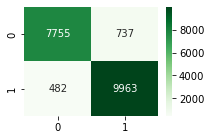

In [19]:
# SVC
model_select(SVC())

Training accuracy:-1.0
Testing accuracy:-0.84458995617046
Accuracy score:-0.84458995617046
roc_auc_score:-0.8298678822993826

Classification report:-
              precision    recall  f1-score   support

         0.0       0.95      0.69      0.80      8492
         1.0       0.79      0.97      0.87     10445

    accuracy                           0.84     18937
   macro avg       0.87      0.83      0.84     18937
weighted avg       0.86      0.84      0.84     18937


Confusion Matrix:-



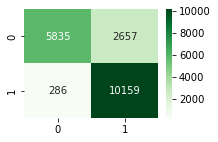

In [20]:
# DecisionTreeClassifier
model_select(DecisionTreeClassifier())

Training accuracy:-0.9564341646675417
Testing accuracy:-0.9340972698949147
Accuracy score:-0.9340972698949147
roc_auc_score:-0.931021819426478

Classification report:-
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      8492
         1.0       0.92      0.96      0.94     10445

    accuracy                           0.93     18937
   macro avg       0.94      0.93      0.93     18937
weighted avg       0.93      0.93      0.93     18937


Confusion Matrix:-



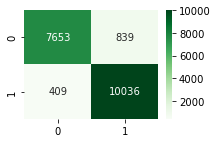

In [21]:
# KNeighborsClassifier
model_select(KNeighborsClassifier())

##### From above we can see that we got the best results using SMOTEENN with SVC and KNeighborsClassifier
##### Hence applying hyperparameter tuning for SVC and  KNeighborsClassifier

##### KNeighborsClassifier

In [28]:
hyper_parameter_tuning(KNeighborsClassifier())

1 1.0 0.9583883402862122 0.041611659713787774
2 0.9890236726564975 0.9453978982943444 0.04362577436215309
3 0.9703526003711583 0.9416486243861224 0.028703975985035934
4 0.9653283845561943 0.936948830332154 0.02837955422404026
5 0.9564341646675417 0.9340972698949147 0.022336894772627014
6 0.9517494228941293 0.9281829223213814 0.023566500572747895
7 0.9461367854071425 0.9258594286317791 0.020277356775363464
8 0.9407052007423166 0.9207899878544648 0.019915212887851808
9 0.9380799348209841 0.9193642076358451 0.01871572718513892


In [ ]:
hyper_parameter_tuning(DecisionTreeClassifier())